In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


## Getting Experiment Enroll rate and Control Enroll Rate


In [9]:
experiment = df[df.group=='experiment']
experimentenrolled = experiment[experiment.action=='enroll']
experimentview = experiment[experiment.action=='view']
experimentenrollRate = experimentenrolled.shape[0]/experimentview.shape[0]
experimentenrollRate

0.007696007696007696

In [12]:
control = df[df.group=='control']
controlenrolled = control[control.action=='enroll']
controlview = control[control.action=='view']
controlenrollRate = controlenrolled.shape[0]/controlview.shape[0]
controlenrollRate

0.012827090815802977

In [18]:
obs_diff = controlenrollRate - experimentenrollRate
obs_diff

0.00513108311979528

# Alternative Hypothesis :  EnrollmentRate in control group - enrollment rate of experiment group > 0
## Null hypothesis: EnrollmentRate in control group - enrollment rate of experiment >= 0


(array([  9.,  45., 191., 440., 553., 455., 227.,  63.,  15.,   2.]),
 array([-0.00547238, -0.00316186, -0.00085134,  0.00145918,  0.0037697 ,
         0.00608022,  0.00839075,  0.01070127,  0.01301179,  0.01532231,
         0.01763283]),
 <a list of 10 Patch objects>)

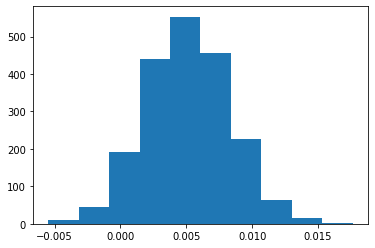

In [20]:
diff = []

for _ in range(2000):
    sample = df.sample(df.shape[0], replace = True)
    experimentEnroll = sample.query("group == 'experiment' and action == 'enroll'")
    experimentview = sample.query("group == 'experiment' and action == 'view'")
    experimentRate = experimentEnroll.shape[0]/experimentview.shape[0]
    controlEnroll = sample.query("group == 'control' and action == 'enroll'")
    controlview = sample.query("group == 'control' and action == 'view'")
    controlRate = controlEnroll.shape[0]/controlview.shape[0]
    diff.append(controlRate - experimentRate)

plt.hist(diff)


# After gathering population, setting the mean to 0 to represent our Null population
## Adding after that the observed difference to check the p value afterwards

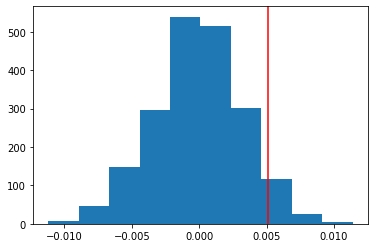

In [23]:
null = np.array(diff)
null = np.random.normal(0, null.std(), null.size)
plt.hist(null)
plt.axvline(x=obs_diff, c='red')

# P Value is in range of 5% or smaller therefor alternative hypothesis rejected.
## Null hypothesis accepted, the enrollment rate of control group - enrollment rate of experiment group is  = 0 or smaller

In [24]:
(null>obs_diff).mean()

0.052